## Predicting Survival on the Titanic using Logistic Regression

This week we will be building a logistic regression classifier to predict survival on the titanic.   

My model will use the independent variables sex and age to predict the dependent variable survived.  There are many other variables in the dataset that you could and should use, that will be your assignment for the week.   (More on that later)

###Data Prep
First, I will start with some data prep to get my data ready to be used in a model

In [364]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [365]:
#reading the data from the disk into memory
df = pd.read_csv("Titanic/train.csv")

In [366]:
#Just a reminder, here are all the column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Module 6 Homework: Logistic Regression with the Titanic
<li> Melanie Klein
<li> 20 February 2017

In [367]:
#Create a new dataframe containing only the features to be used (plus the dependent variable)
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['parch'] = df['Parch']
X['sibsp'] = df['SibSp']
X['pclass'] = df['Pclass']
X['embarked'] = df['Embarked']
X['survived'] = df['Survived']

In [368]:
#Dropping missing values
X = X.dropna(axis=0)

In [369]:
#survived will be my dependent variable, y.   I'll assign it to y and remove it from X
y = X['survived']
X = X.drop(['survived'], axis=1)

In [370]:
#implement one hot encoding for the categorical feature Sex
#Pclass is also categorical, but since it is numeric/oridinal, we can leave it as-is
pd.get_dummies(X.sex)

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0
10,1.0,0.0


In [371]:
#use the dummies to convert the 'sex' variable into a binary feature indicating 'isFemale'
X['sex'] = pd.get_dummies(X.sex)['female']

In [372]:
#repeat one hot encoding for Embarked feature
pd.get_dummies(X.embarked)

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0
10,0.0,0.0,1.0


In [373]:
#need to add two binary features for Embarked: embarkedCherbourg and embarkedQueenstown
#embarkedSouthampton would be implied if both of these features are false
X['embarkedCherbourg'] = pd.get_dummies(X.embarked)['C']
X['embarkedQueenstown'] = pd.get_dummies(X.embarked)['Q']

In [374]:
#drop the original embarked indicator
X = X.drop(['embarked'], axis=1)

In [375]:
#remember to scale our features, as with linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [376]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [377]:
#Create a base rate model that assumes everyone dies
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [378]:
#how accurate is my base rate model?
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.56


In [379]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [380]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [381]:
print("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.81


In [382]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [383]:
print("---Base Model---")
#base rate AUC
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test,base_rate_model(X_test) ))
print("\n\n---Logistic Model---")
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model.predict(X_test) ))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.56      1.00      0.72        80
          1       0.00      0.00      0.00        63

avg / total       0.31      0.56      0.40       143



---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.78      0.91      0.84        80
          1       0.86      0.68      0.76        63

avg / total       0.82      0.81      0.81       143



C:\Users\mmcla\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [384]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

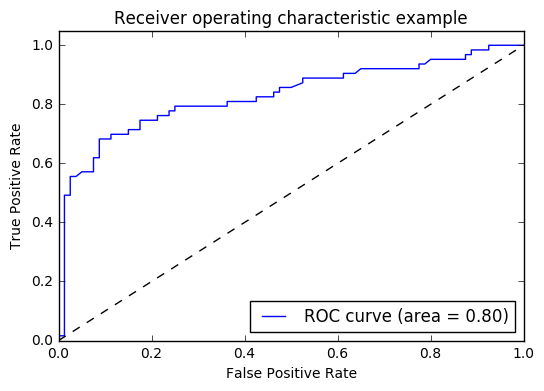

In [385]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()